In [37]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## Matrice de confusion sur l'échantillon, pour le meilleur modèle

In [38]:
with open('./experiments/base_model/wrong_res.json') as json_file:  
    wrong_res = json.load(json_file)
with open('./experiments/base_model/right_res.json') as json_file:  
    right_res = json.load(json_file)

In [39]:
print(wrong_res['count'])

63


In [40]:
print(right_res['count'])

187


In [41]:
def return_list_of_int(dico, key):
    list_of_int = dico[key][1:-1].split(" ")
    list_of_int = [int(el.replace('\n', '')) for el in list_of_int]
    return list_of_int

In [42]:
right_pred = return_list_of_int(right_res, 'predictions')
wrong_pred = return_list_of_int(wrong_res, 'predictions')
right_lab = return_list_of_int(right_res, 'labels')
wrong_lab = return_list_of_int(wrong_res, 'labels')

In [43]:
y_pred = right_pred + wrong_pred
y_true = right_lab + wrong_lab

In [44]:
len(y_pred), len(y_true)

(250, 250)

In [45]:
class_names = ['at', 'at2', 'bs', 'ct', 'u']

In [46]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    """
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    """
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
np.set_printoptions(precision=2)

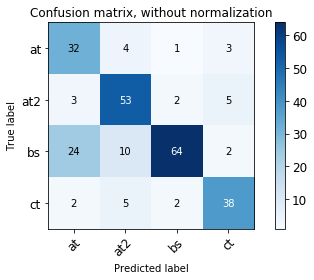

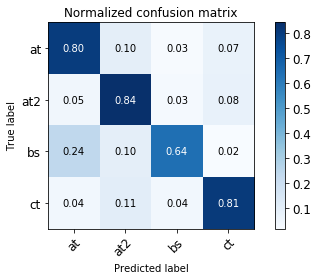

In [47]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()